# Thumbtack Analytics take-home Assignment
#### Deepa Goyal 11/22/2016

In [2]:
import pandas as pd
# pd.set_option('max_colwidth', 50)
# set this if you need to
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import requests

### Import csv to dataframe

In [43]:
quotes = pd.read_csv('../data/quotes.csv', parse_dates=True)
visitors = pd.read_csv('../data/visitors.csv', parse_dates=True)

### Let's take a look at these datasets

In [44]:
print quotes.shape
print visitors.shape

(64330, 5)
(59996, 8)


In [45]:
quotes.head()

,request_id,quote_id,quote_price,hired,pro_id
0,1,38912310,NaN,0,851539
1,1,38912311,210.0,0,10113954
2,1,38913628,NaN,0,13498826
3,1,38914071,NaN,0,15921289
4,1,38912344,NaN,0,14506387


In [46]:
visitors.head()

,session_date,device,category_name,sent_request,request_id,how_far,num_bedrooms,num_bathrooms
0,8/1/16,desktop,House Cleaning (One Time),1,9067.0,NaN,1 bedroom,1 bathroom
1,8/1/16,desktop,Local Moving (under 50 miles),1,12707.0,Less than 5 miles,NaN,NaN
2,8/1/16,desktop,Local Moving (under 50 miles),1,19561.0,Less than 5 miles,NaN,NaN
3,8/1/16,mobile,Local Moving (under 50 miles),1,31010.0,Less than 5 miles,NaN,NaN
4,8/1/16,mobile,Local Moving (under 50 miles),1,6887.0,11 - 20 miles,NaN,NaN


In [50]:
visitors['session_date'] = pd.to_datetime(visitors['session_date'])

### 1. Visitors and Conversion rate
#### How does the number of users change over time? 

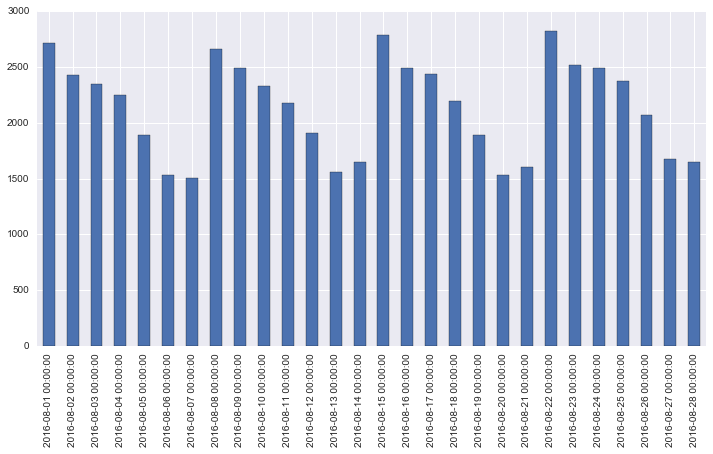

In [143]:
visitors.session_date.value_counts().sort_index().plot(kind='line', figsize = (12,6))

##### Observations
1. We have data for all dates starting 08/01/2016 to 08/28/2016 with no dates missing.
2. Exactly 4 weeks of data
3. There seems to be a 7 day repeating pattern with number of visitors spiking on day 1.
4. Since 08/01/2016 was a monday, we can interpret the spikes on mondays while weekends being fairly low.

#### What percent of users submit a project request?

In [136]:
from __future__ import division
#Users with sent request = 1
print visitors[visitors.sent_request==1].shape[0]
#All Users
print visitors.shape[0]
#Users who sent request as a percent of total users
print 'In the time frame of this data ' + str(100* visitors[visitors.sent_request==1].shape[0] / visitors.shape[0]) + '% of users sent requests'

34146
59996
In the time frame of this data 56.913794253% of users sent requests


#### How do category and device influence these metrics?

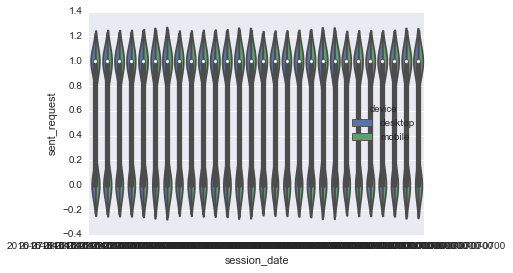

In [141]:
sns.violinplot(x="session_date", y="sent_request", hue="device", data=visitors, split=True);

### 2. Quotes per request

#### What is the distribution of number of quotes per request?